In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

# generate a daily signal covering one year 2016 in a pandas dataframe
N = 360
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal_inc" : (np.arange(N)//40 +  np.arange(N) % 7 + np.random.randn(N)),
                         "Signal_dec" : -(np.arange(N)//40 +  np.arange(N) % 7 + np.random.randn(N))
                        })
df_train["Signal_dec"] = -df_train["Signal_inc"]

In [2]:
df_train.head(12)

Date  Signal_inc  Signal_dec
0  2016-01-25    0.772536   -0.772536
1  2016-01-26    0.639580   -0.639580
2  2016-01-27    2.529484   -2.529484
3  2016-01-28    2.051855   -2.051855
4  2016-01-29    3.500061   -3.500061
5  2016-01-30    5.368790   -5.368790
6  2016-01-31    4.842563   -4.842563
7  2016-02-01   -1.726333    1.726333
8  2016-02-02    0.832260   -0.832260
9  2016-02-03    0.726883   -0.726883
10 2016-02-04    2.066530   -2.066530
11 2016-02-05    5.009234   -5.009234

In [3]:
df_train.tail(12)

Date  Signal_inc  Signal_dec
348 2017-01-07   13.121446  -13.121446
349 2017-01-08   13.739738  -13.739738
350 2017-01-09    7.906841   -7.906841
351 2017-01-10    8.744047   -8.744047
352 2017-01-11    9.619398   -9.619398
353 2017-01-12   11.289378  -11.289378
354 2017-01-13   11.015584  -11.015584
355 2017-01-14   14.436068  -14.436068
356 2017-01-15   14.312712  -14.312712
357 2017-01-16    9.579231   -9.579231
358 2017-01-17    9.840130   -9.840130
359 2017-01-18   11.064202  -11.064202

<AxesSubplot: xlabel='Date'>

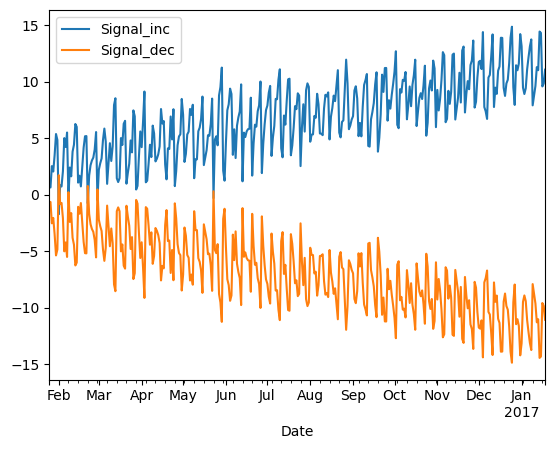

In [4]:
df_train.plot('Date' , ['Signal_inc', 'Signal_dec'])

In [5]:

import pyaf.ForecastEngine as autof
# create a forecast engine. This is the main object handling all the operations
lEngine = autof.cForecastEngine()

# get the best time series model for predicting one week
lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = ['Signal_dec' , 'Signal_inc'], iHorizon = 7);
lEngine.getModelInfo() # => relative error 7% (MAPE)


INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signals': ['Signal_dec', 'Signal_inc'], 'Horizons': {'Signal_dec': 7, 'Signal_inc': 7}}))
INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['Signal_dec', 'Signal_inc'], 'Transformations': [('Signal_dec', 'None', '_', 'T+S+R'), ('Signal_dec', 'None', 'Diff_', 'T+S+R'), ('Signal_dec', 'None', 'RelDiff_', 'T+S+R'), ('Signal_dec', 'None', 'CumSum_', 'T+S+R'), ('Signal_inc', 'None', '_', 'T+S+R'), ('Signal_inc', 'None', 'Diff_', 'T+S+R'), ('Signal_inc', 'None', 'RelDiff_', 'T+S+R'), ('Signal_inc', 'None', 'CumSum_', 'T+S+R')], 'Cores': 8}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_dec', 'Horizon': 7, 'Transformation': '_Signal_dec', 'DecompositionType': 'T+S+R'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_dec', 'Horizon': 7, 'Transformation': 'Diff_Signal_dec', 'DecompositionType': 'T+S+R'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_dec',

INFO:pyaf.std:LINEAR_RIDGE_TREND LinearTrend (0.741351, array([-0.41112]))
INFO:pyaf.std:TREND_DETAIL_END
INFO:pyaf.std:CYCLE_MODEL_DETAIL_START
INFO:pyaf.std:BEST_CYCLE_LENGTH_VALUES _Signal_dec_LinearTrend_residue_Cycle_7 7 0.004445 {0: 0.177567, 1: 0.109015, 2: 0.055018, 3: 0.006148, 4: -0.058883, 5: -0.121065, 6: -0.158614}
INFO:pyaf.std:CYCLE_MODEL_DETAIL_END
INFO:pyaf.std:AR_MODEL_DETAIL_START
INFO:pyaf.std:AR_MODEL_DETAIL_END
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2016-01-25T00:00:00.000000 TimeMax=2016-11-01T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Signal_inc' Length=360  Min=-1.726333 Max=14.862898  Mean=6.95711 StdDev=3.385982
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Signal_inc' Min=0.0 Max=1.0  Mean=0.523439 StdDev=0.204107
INFO:pyaf.std:DECOMPOSITION_TYPE 'T+S+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Signal_inc_LinearTrend_resi

INFO:pyaf.timing:('OPERATION_START', ('PLOTTING', {'Signals': ['Signal_dec', 'Signal_inc']}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 2.898, ('PLOTTING', {'Signals': ['Signal_dec', 'Signal_inc']}))


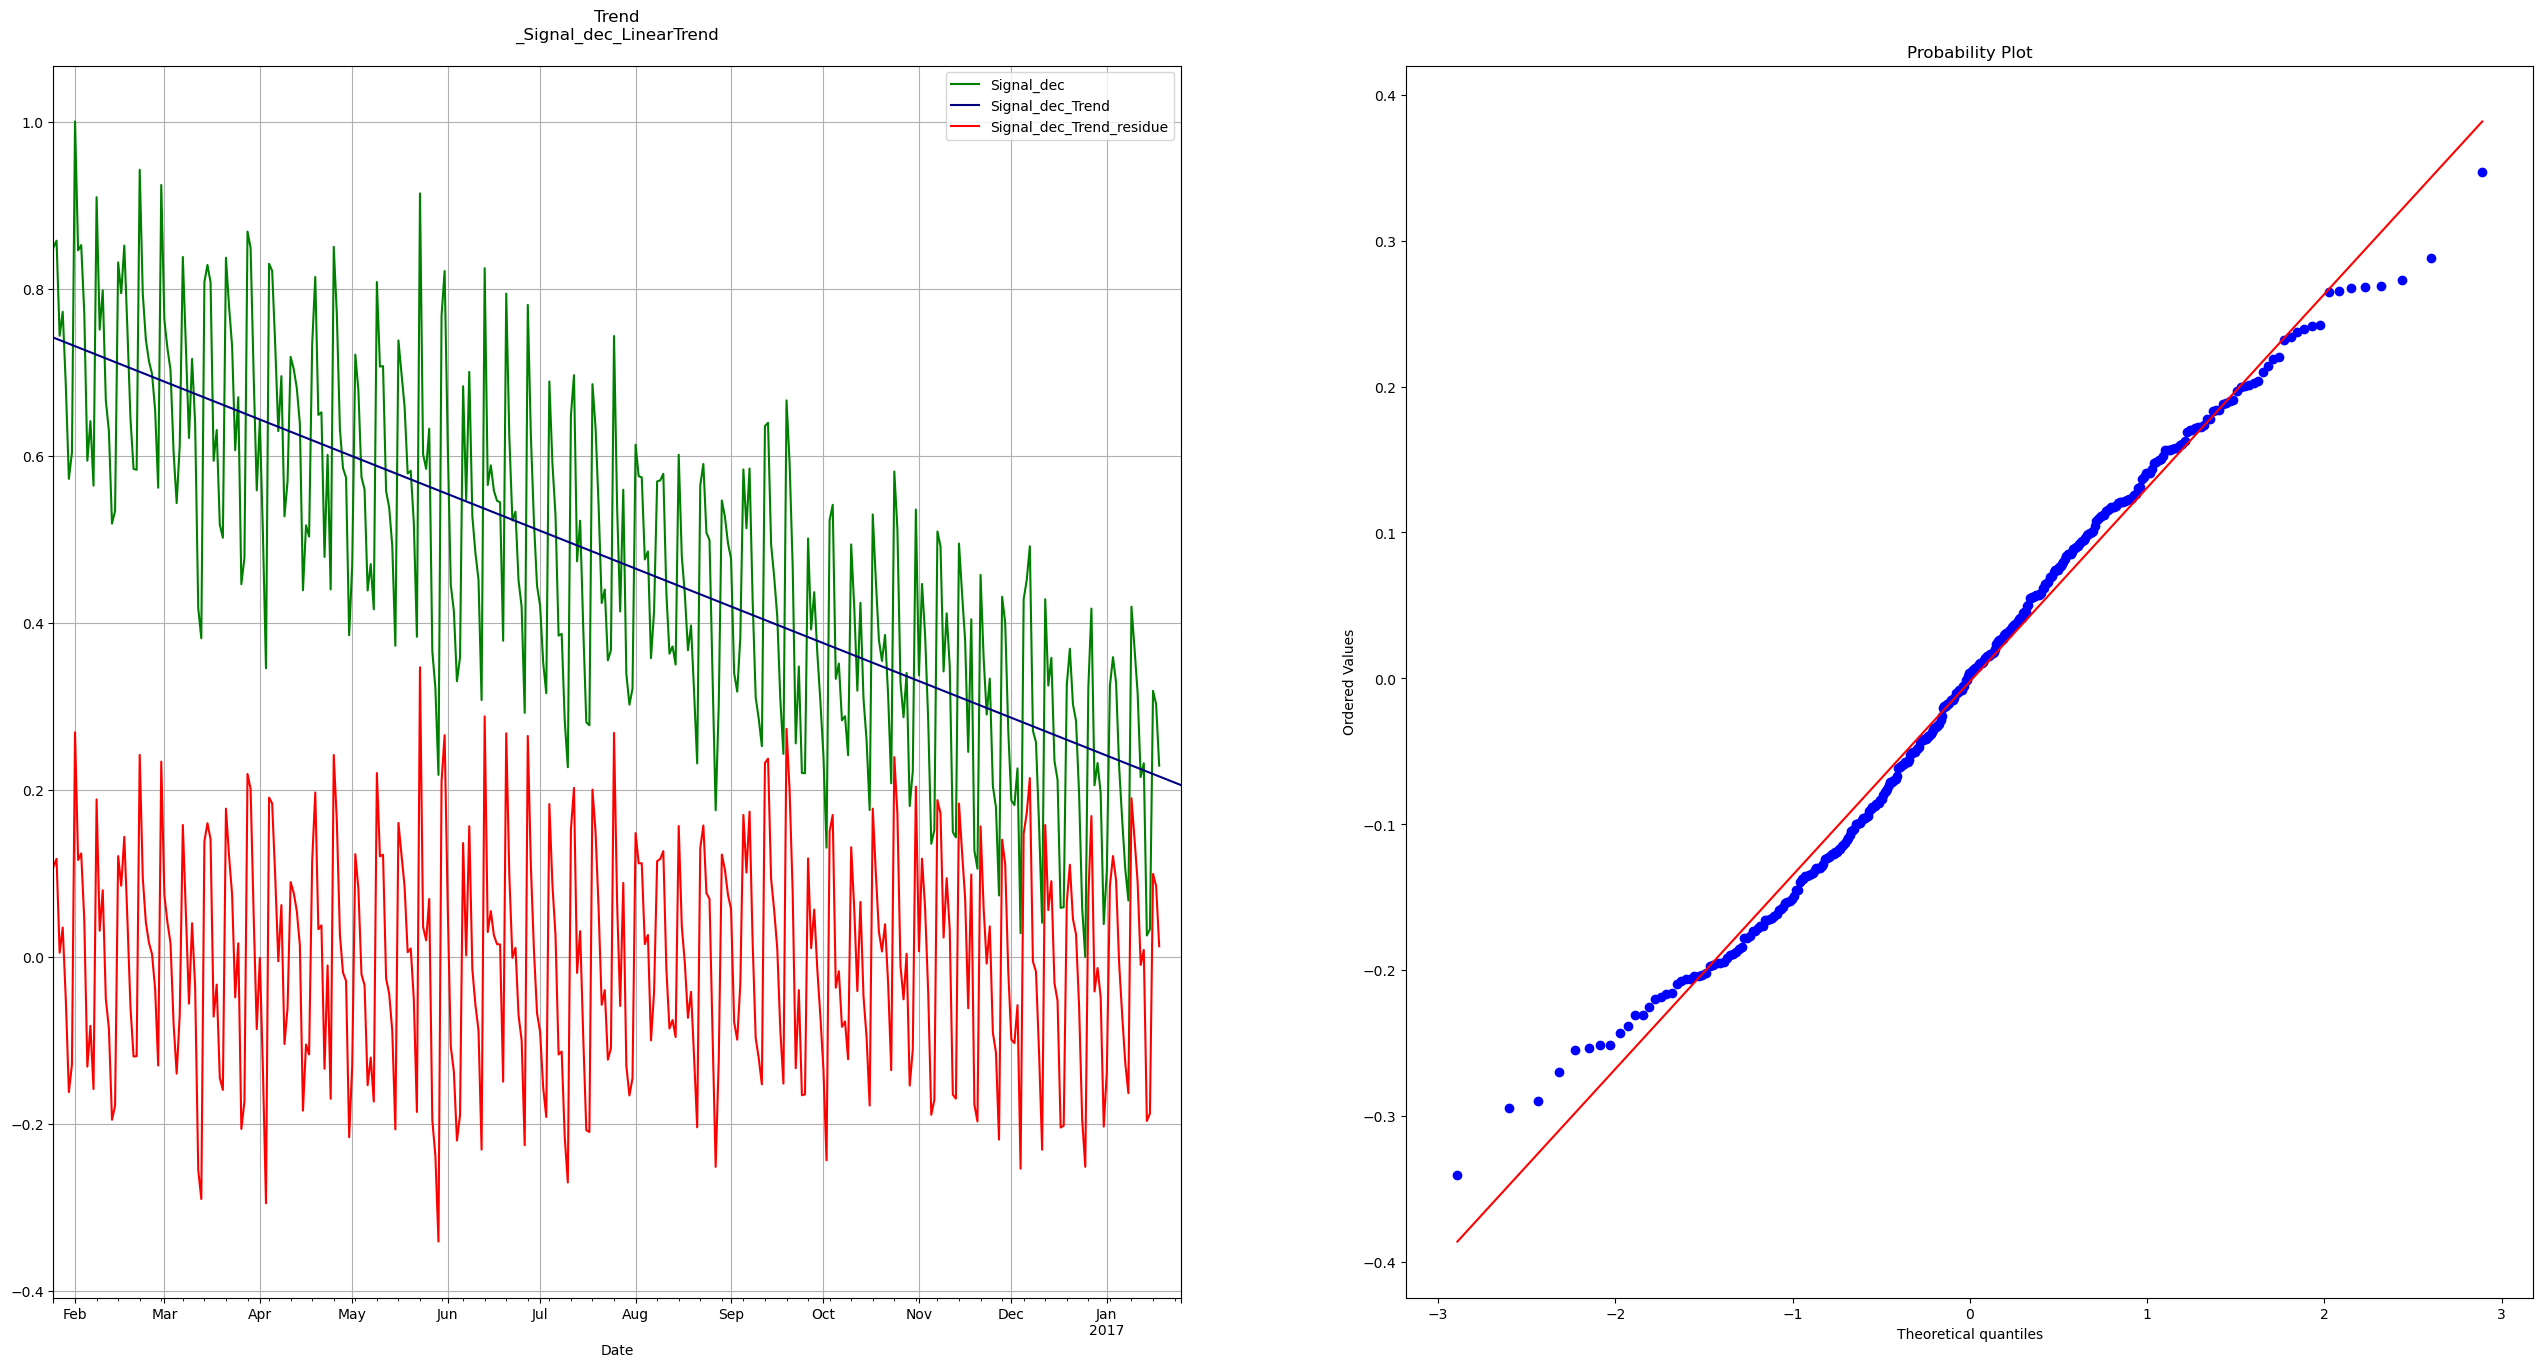

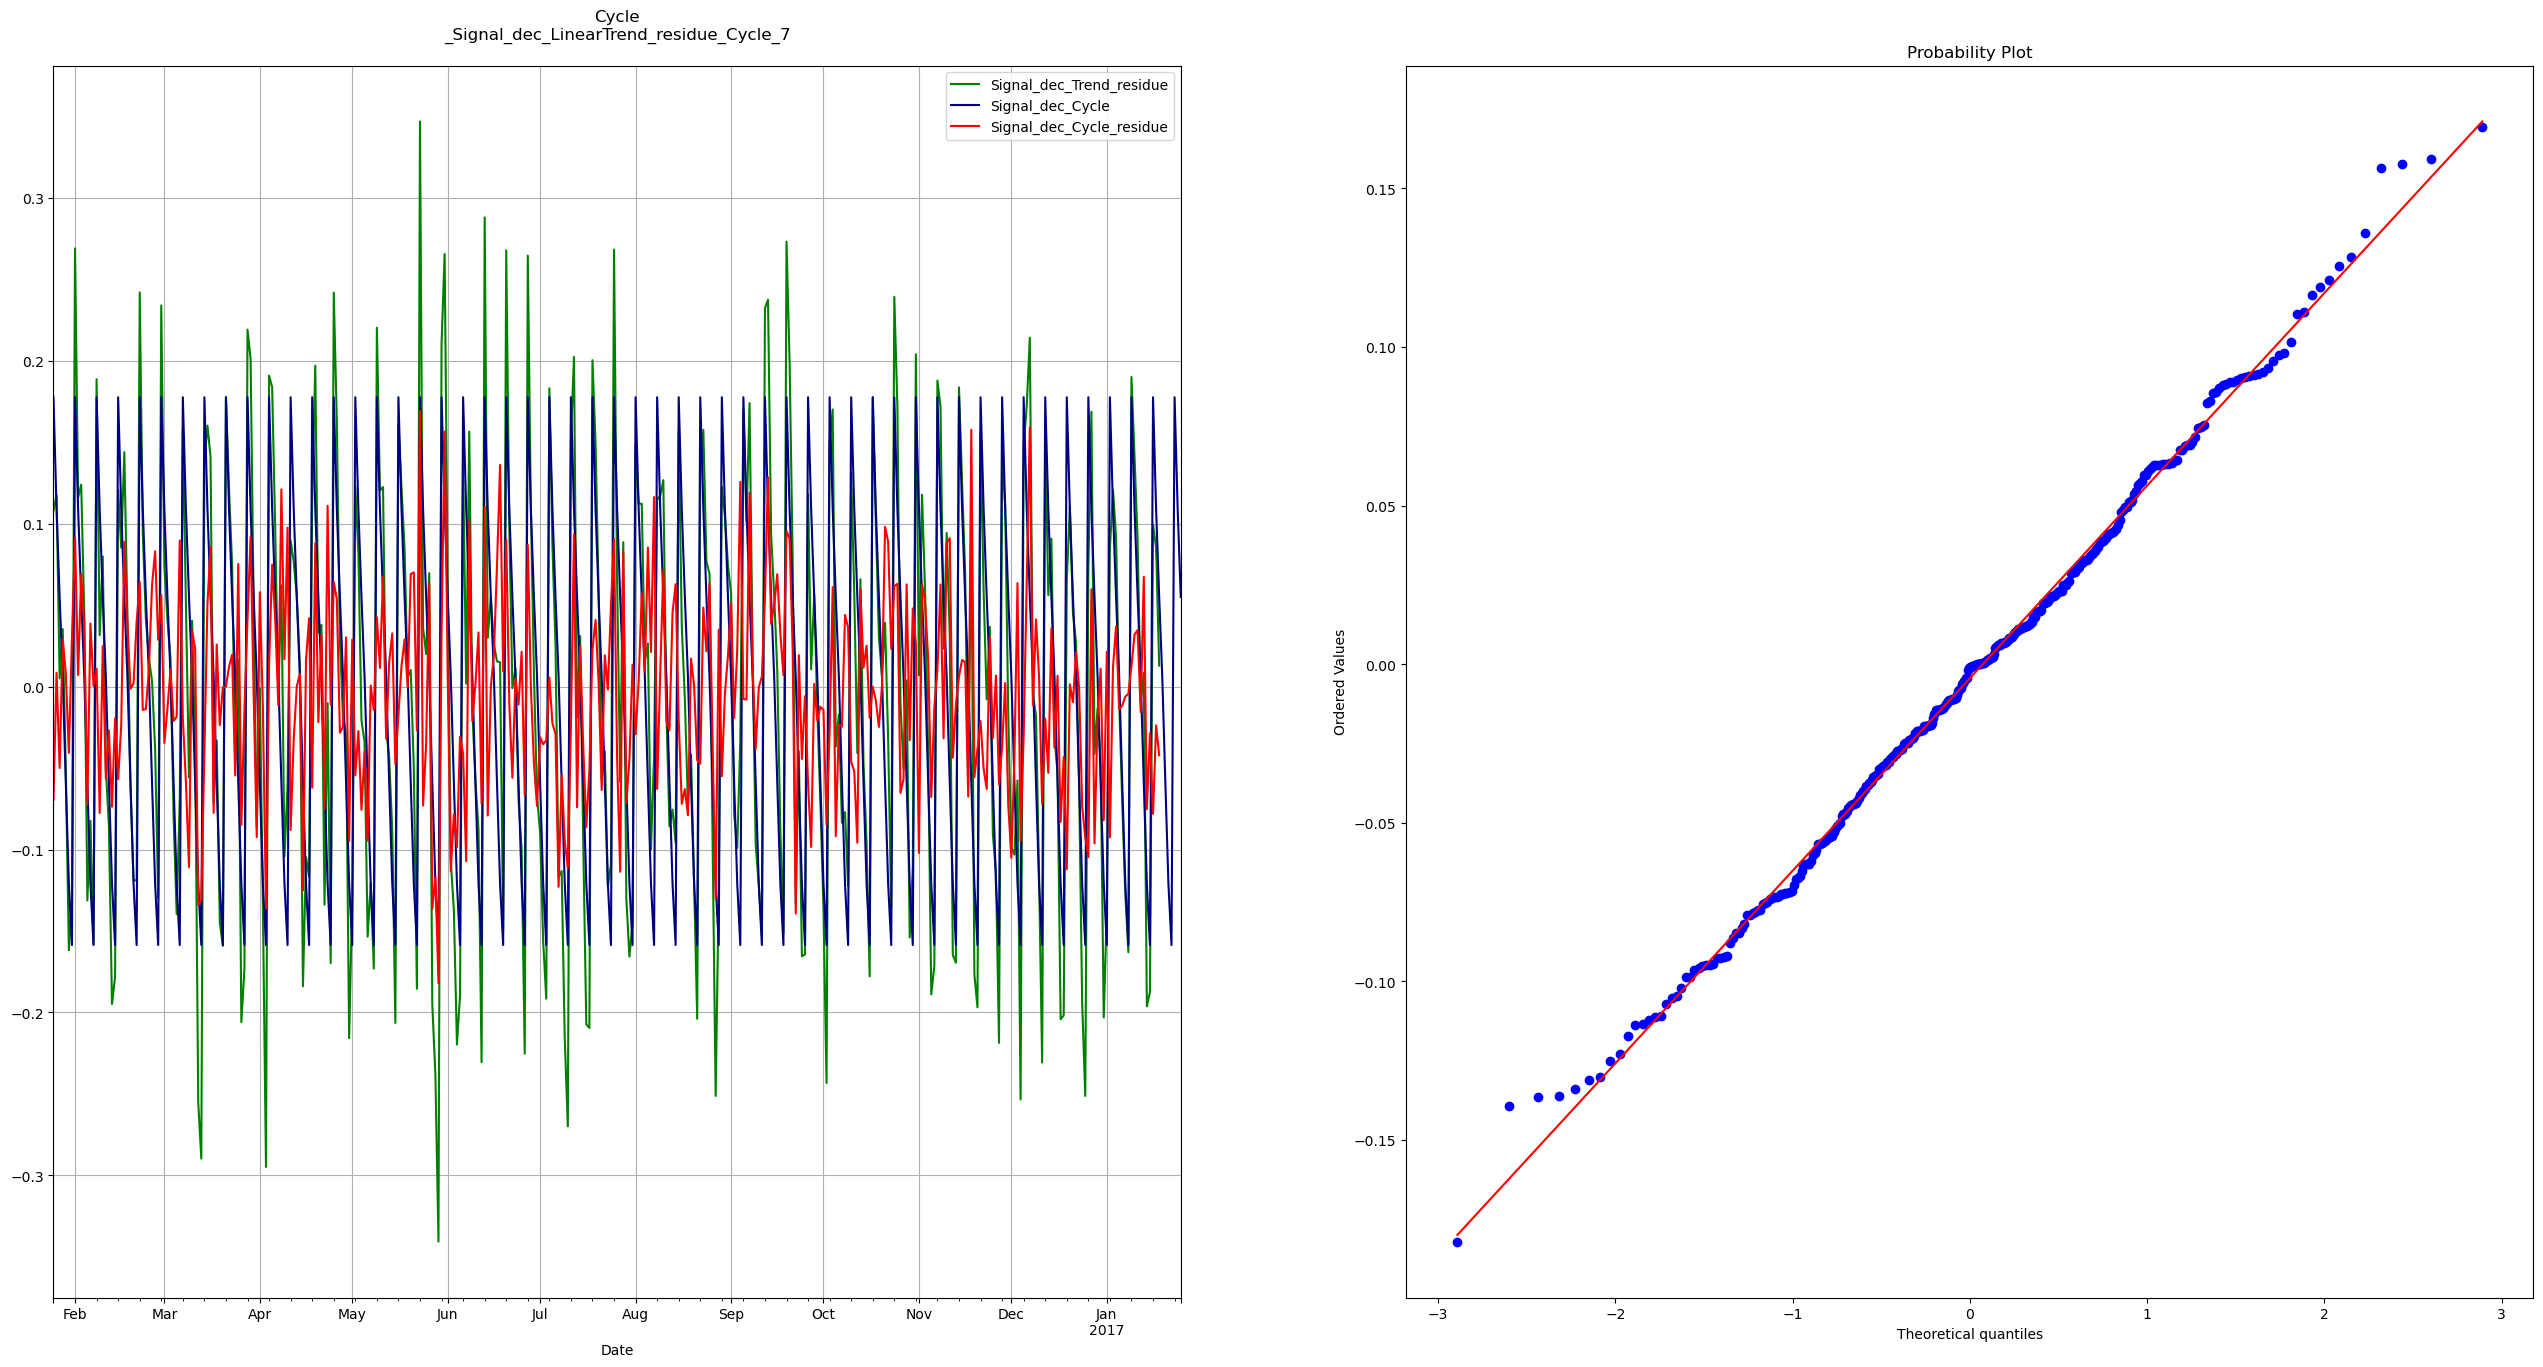

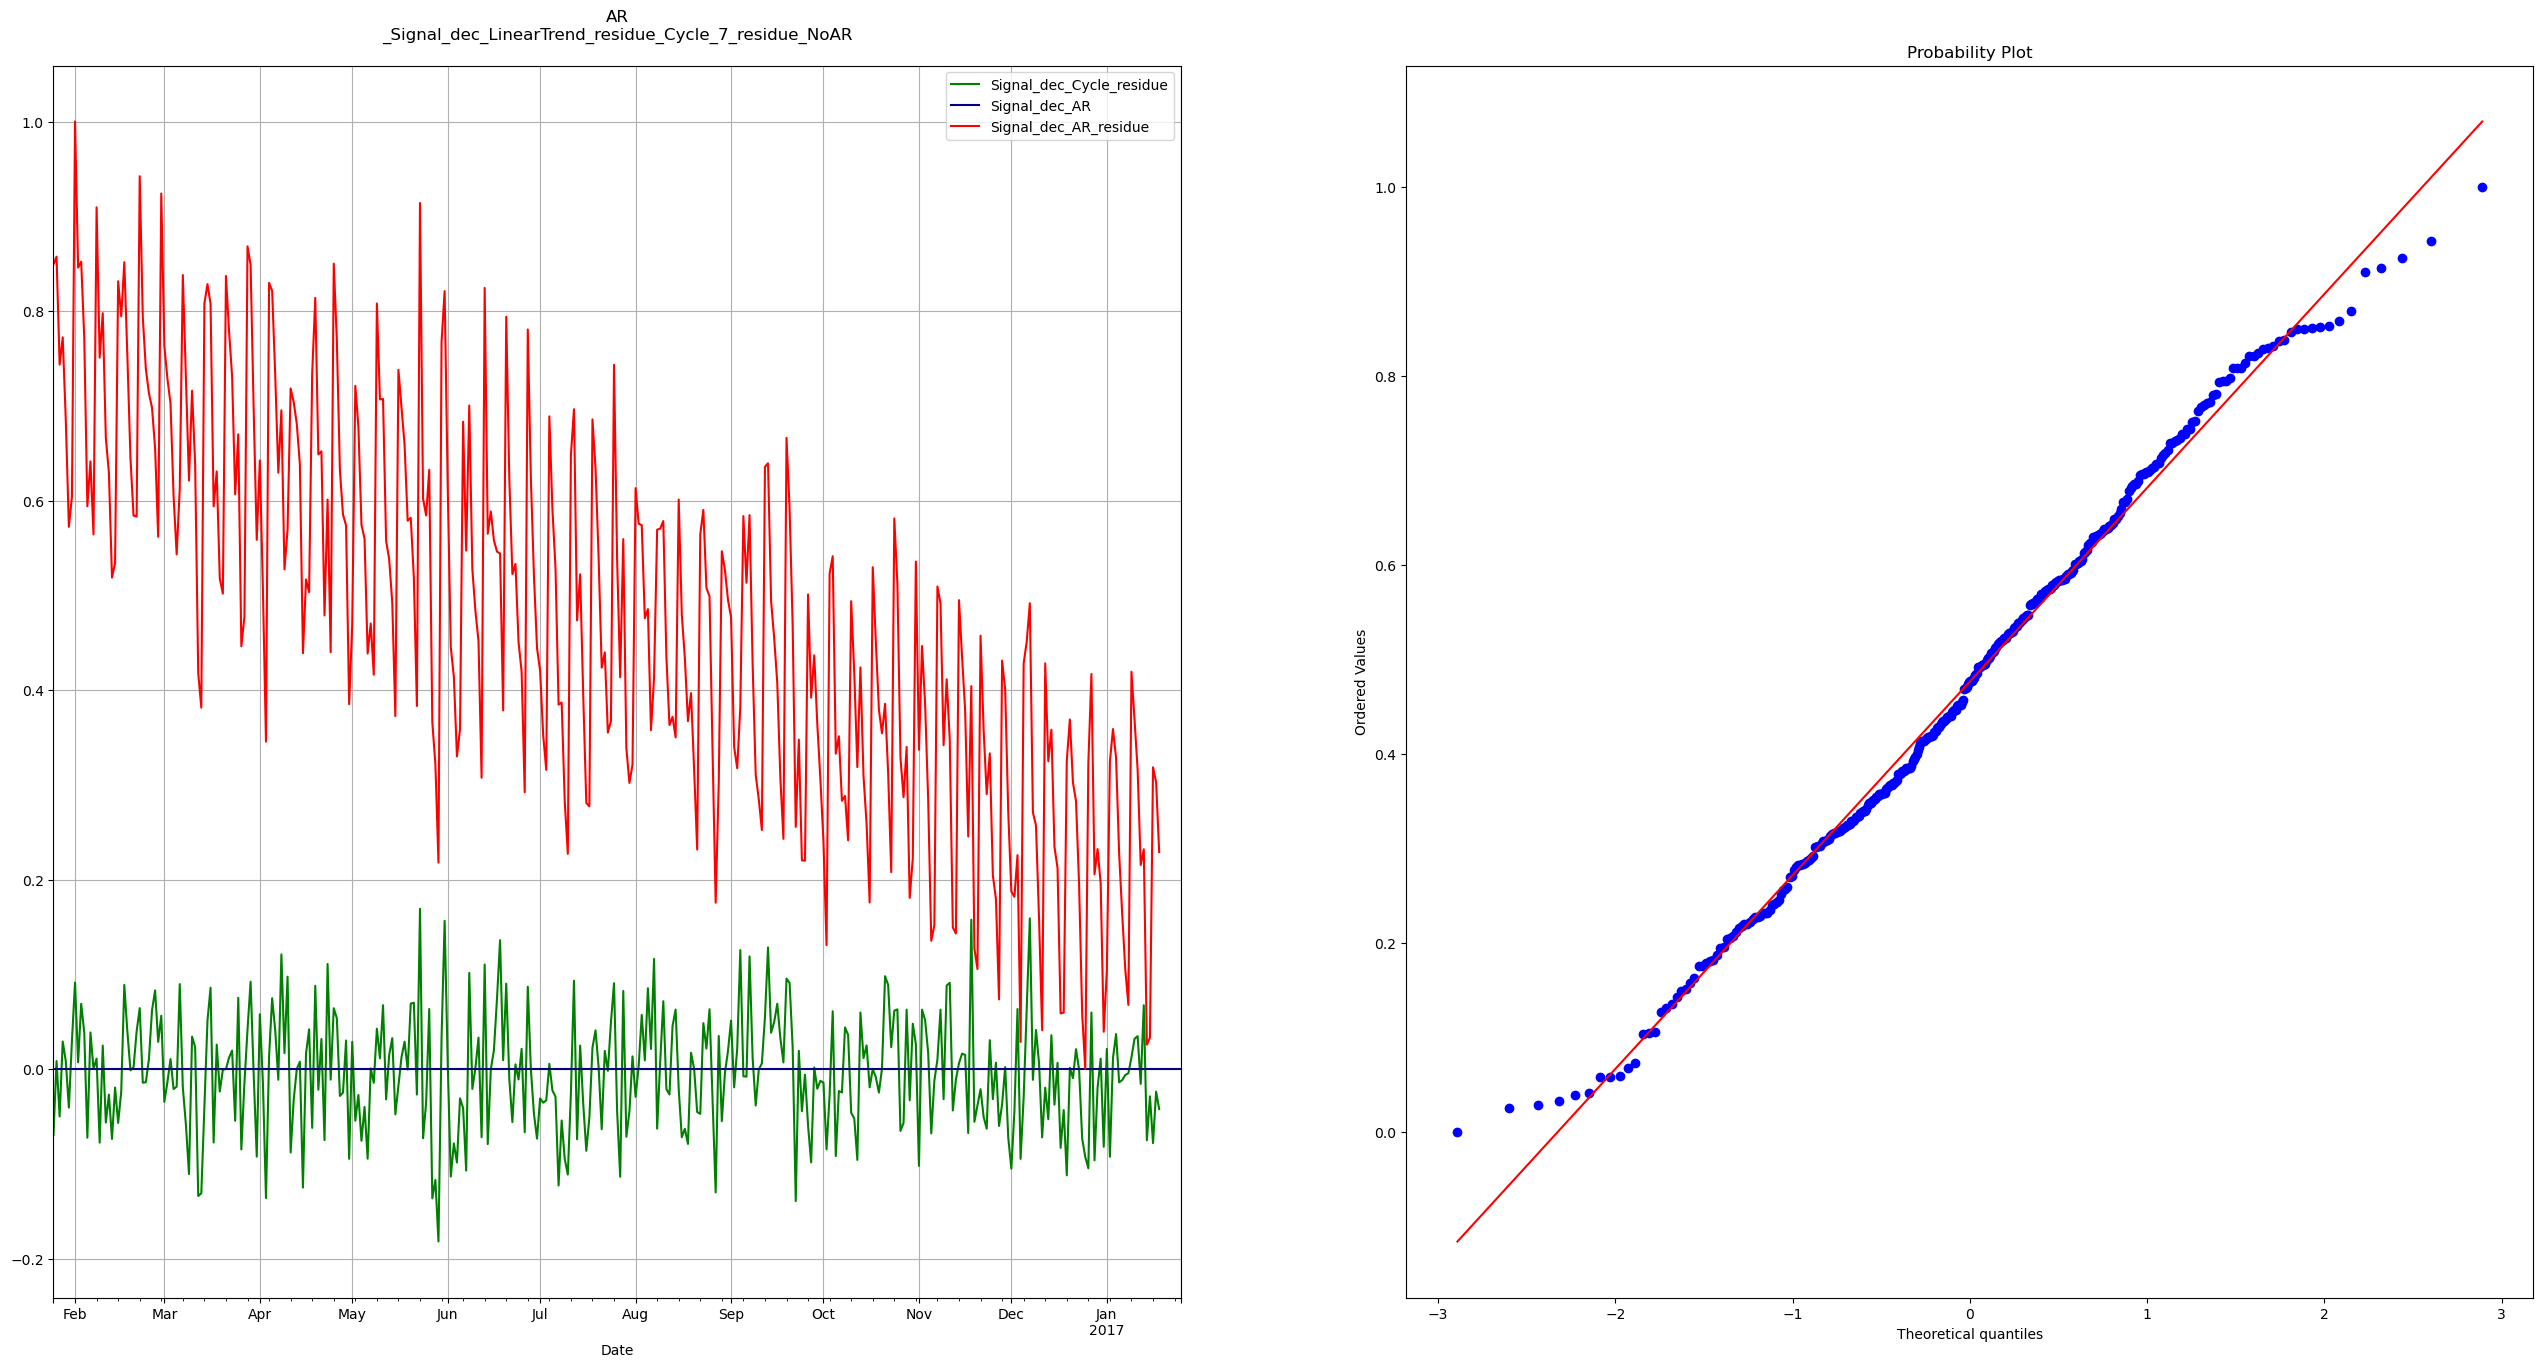

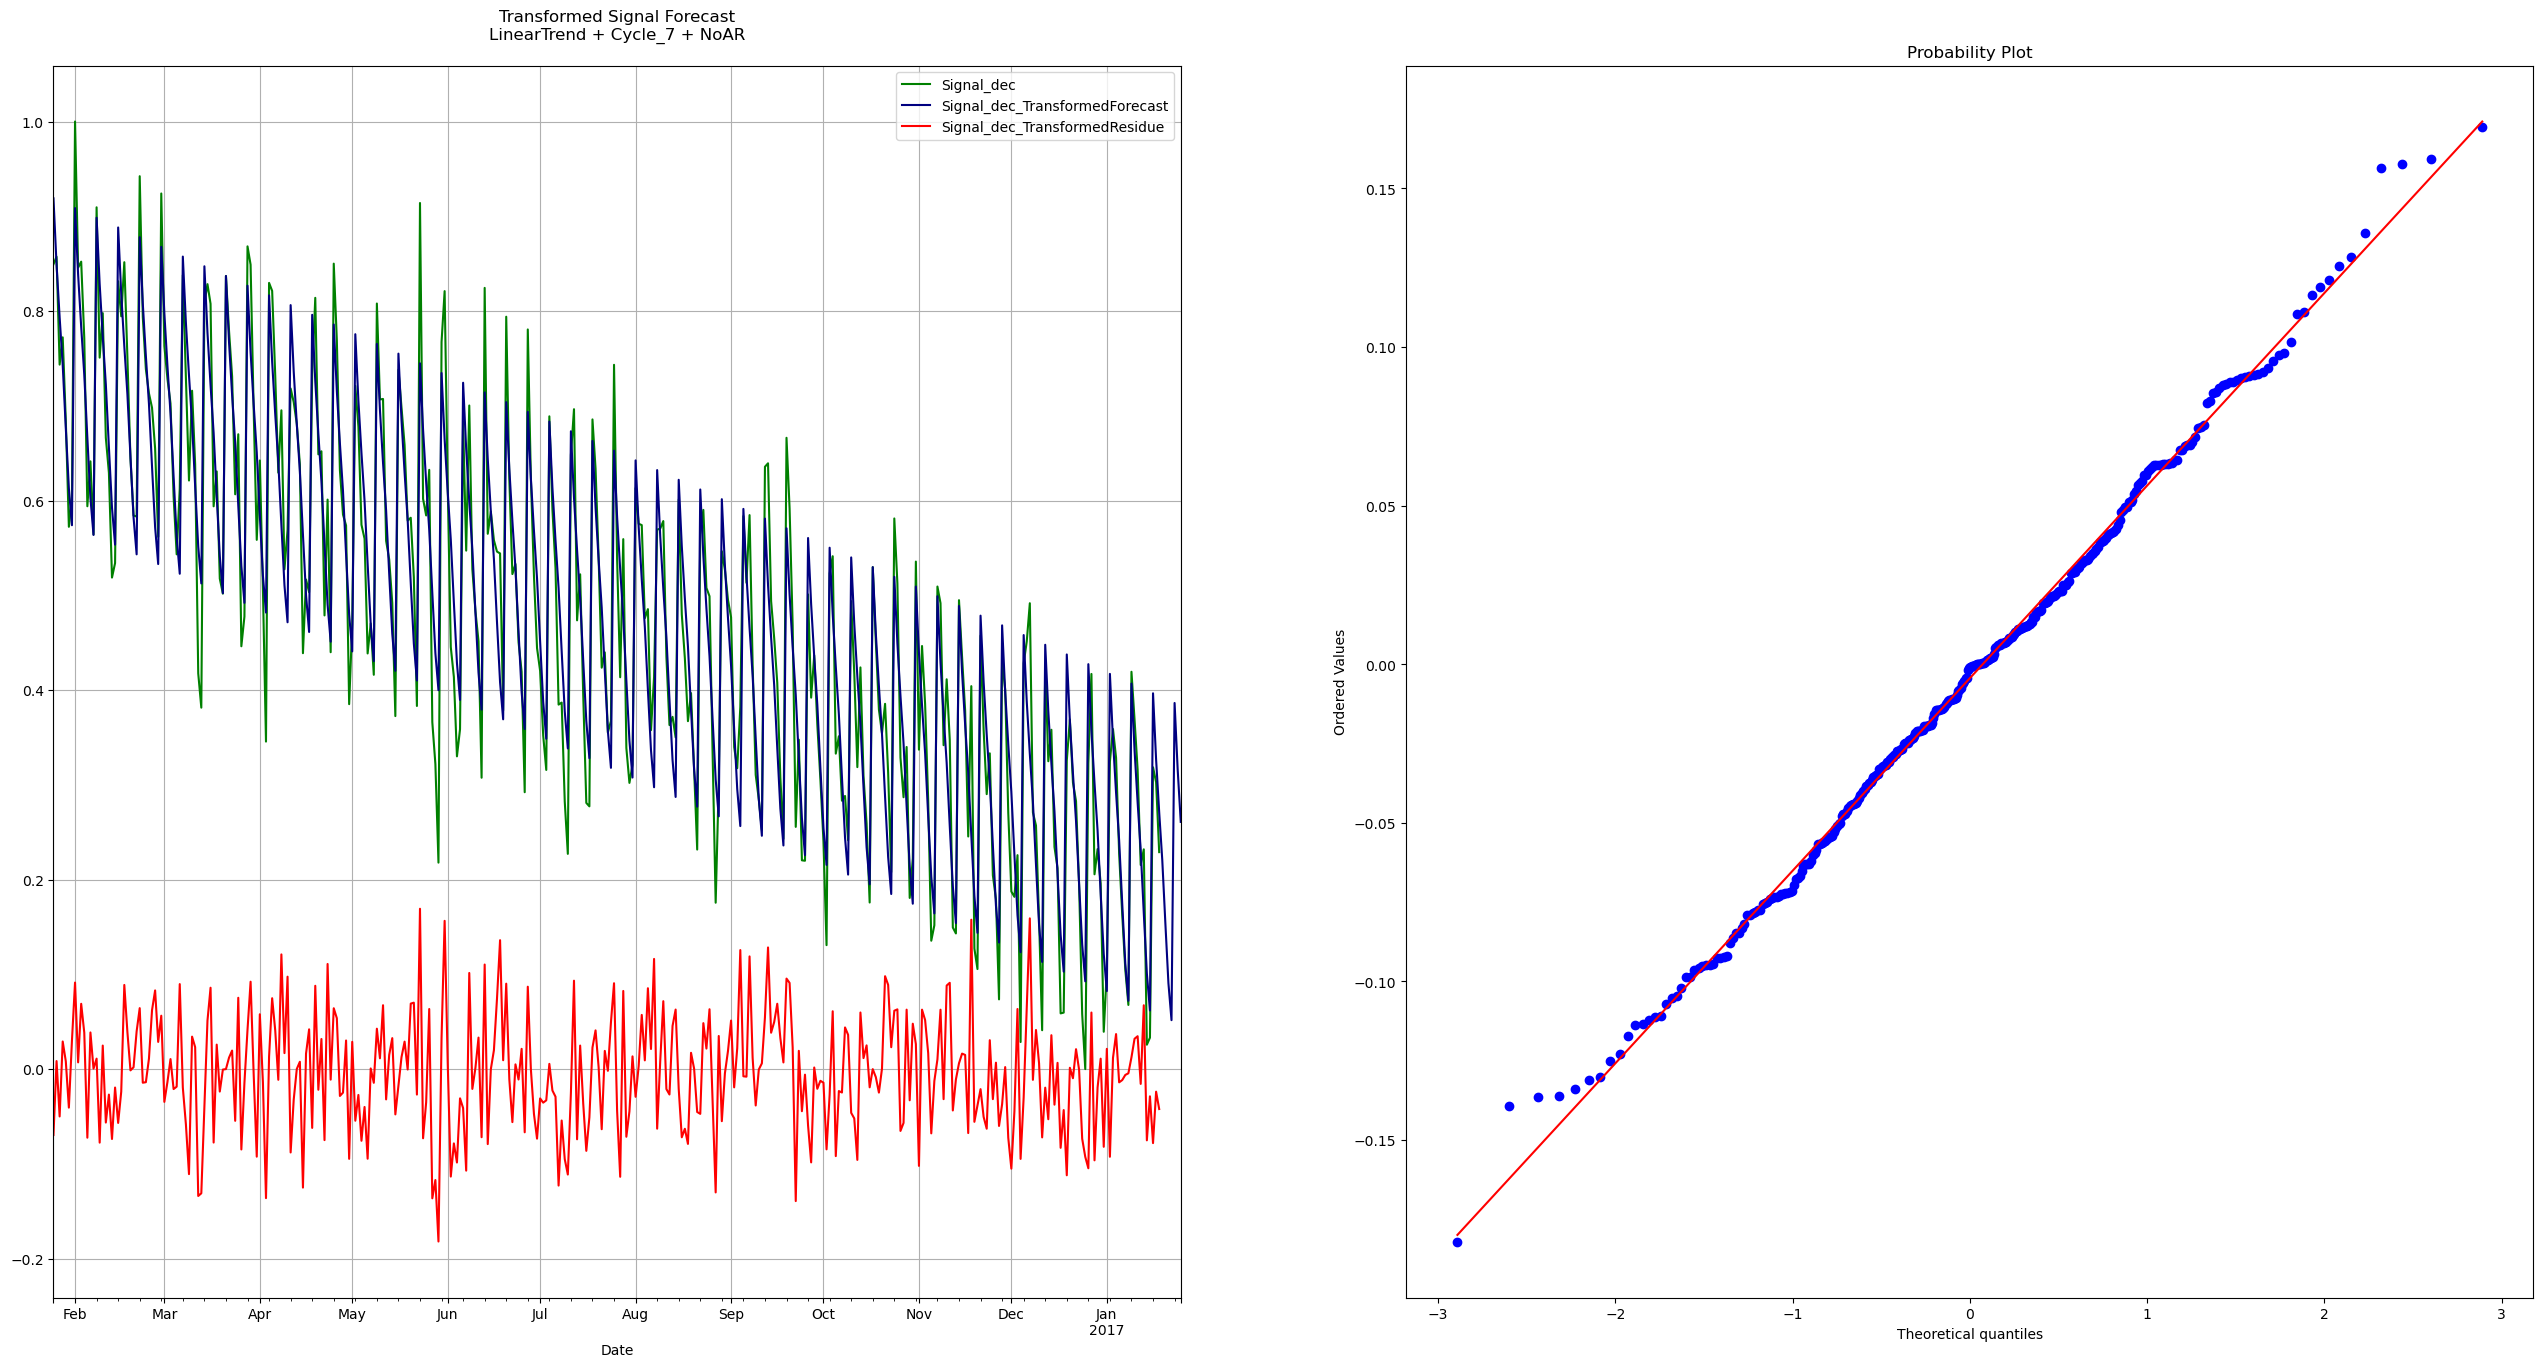

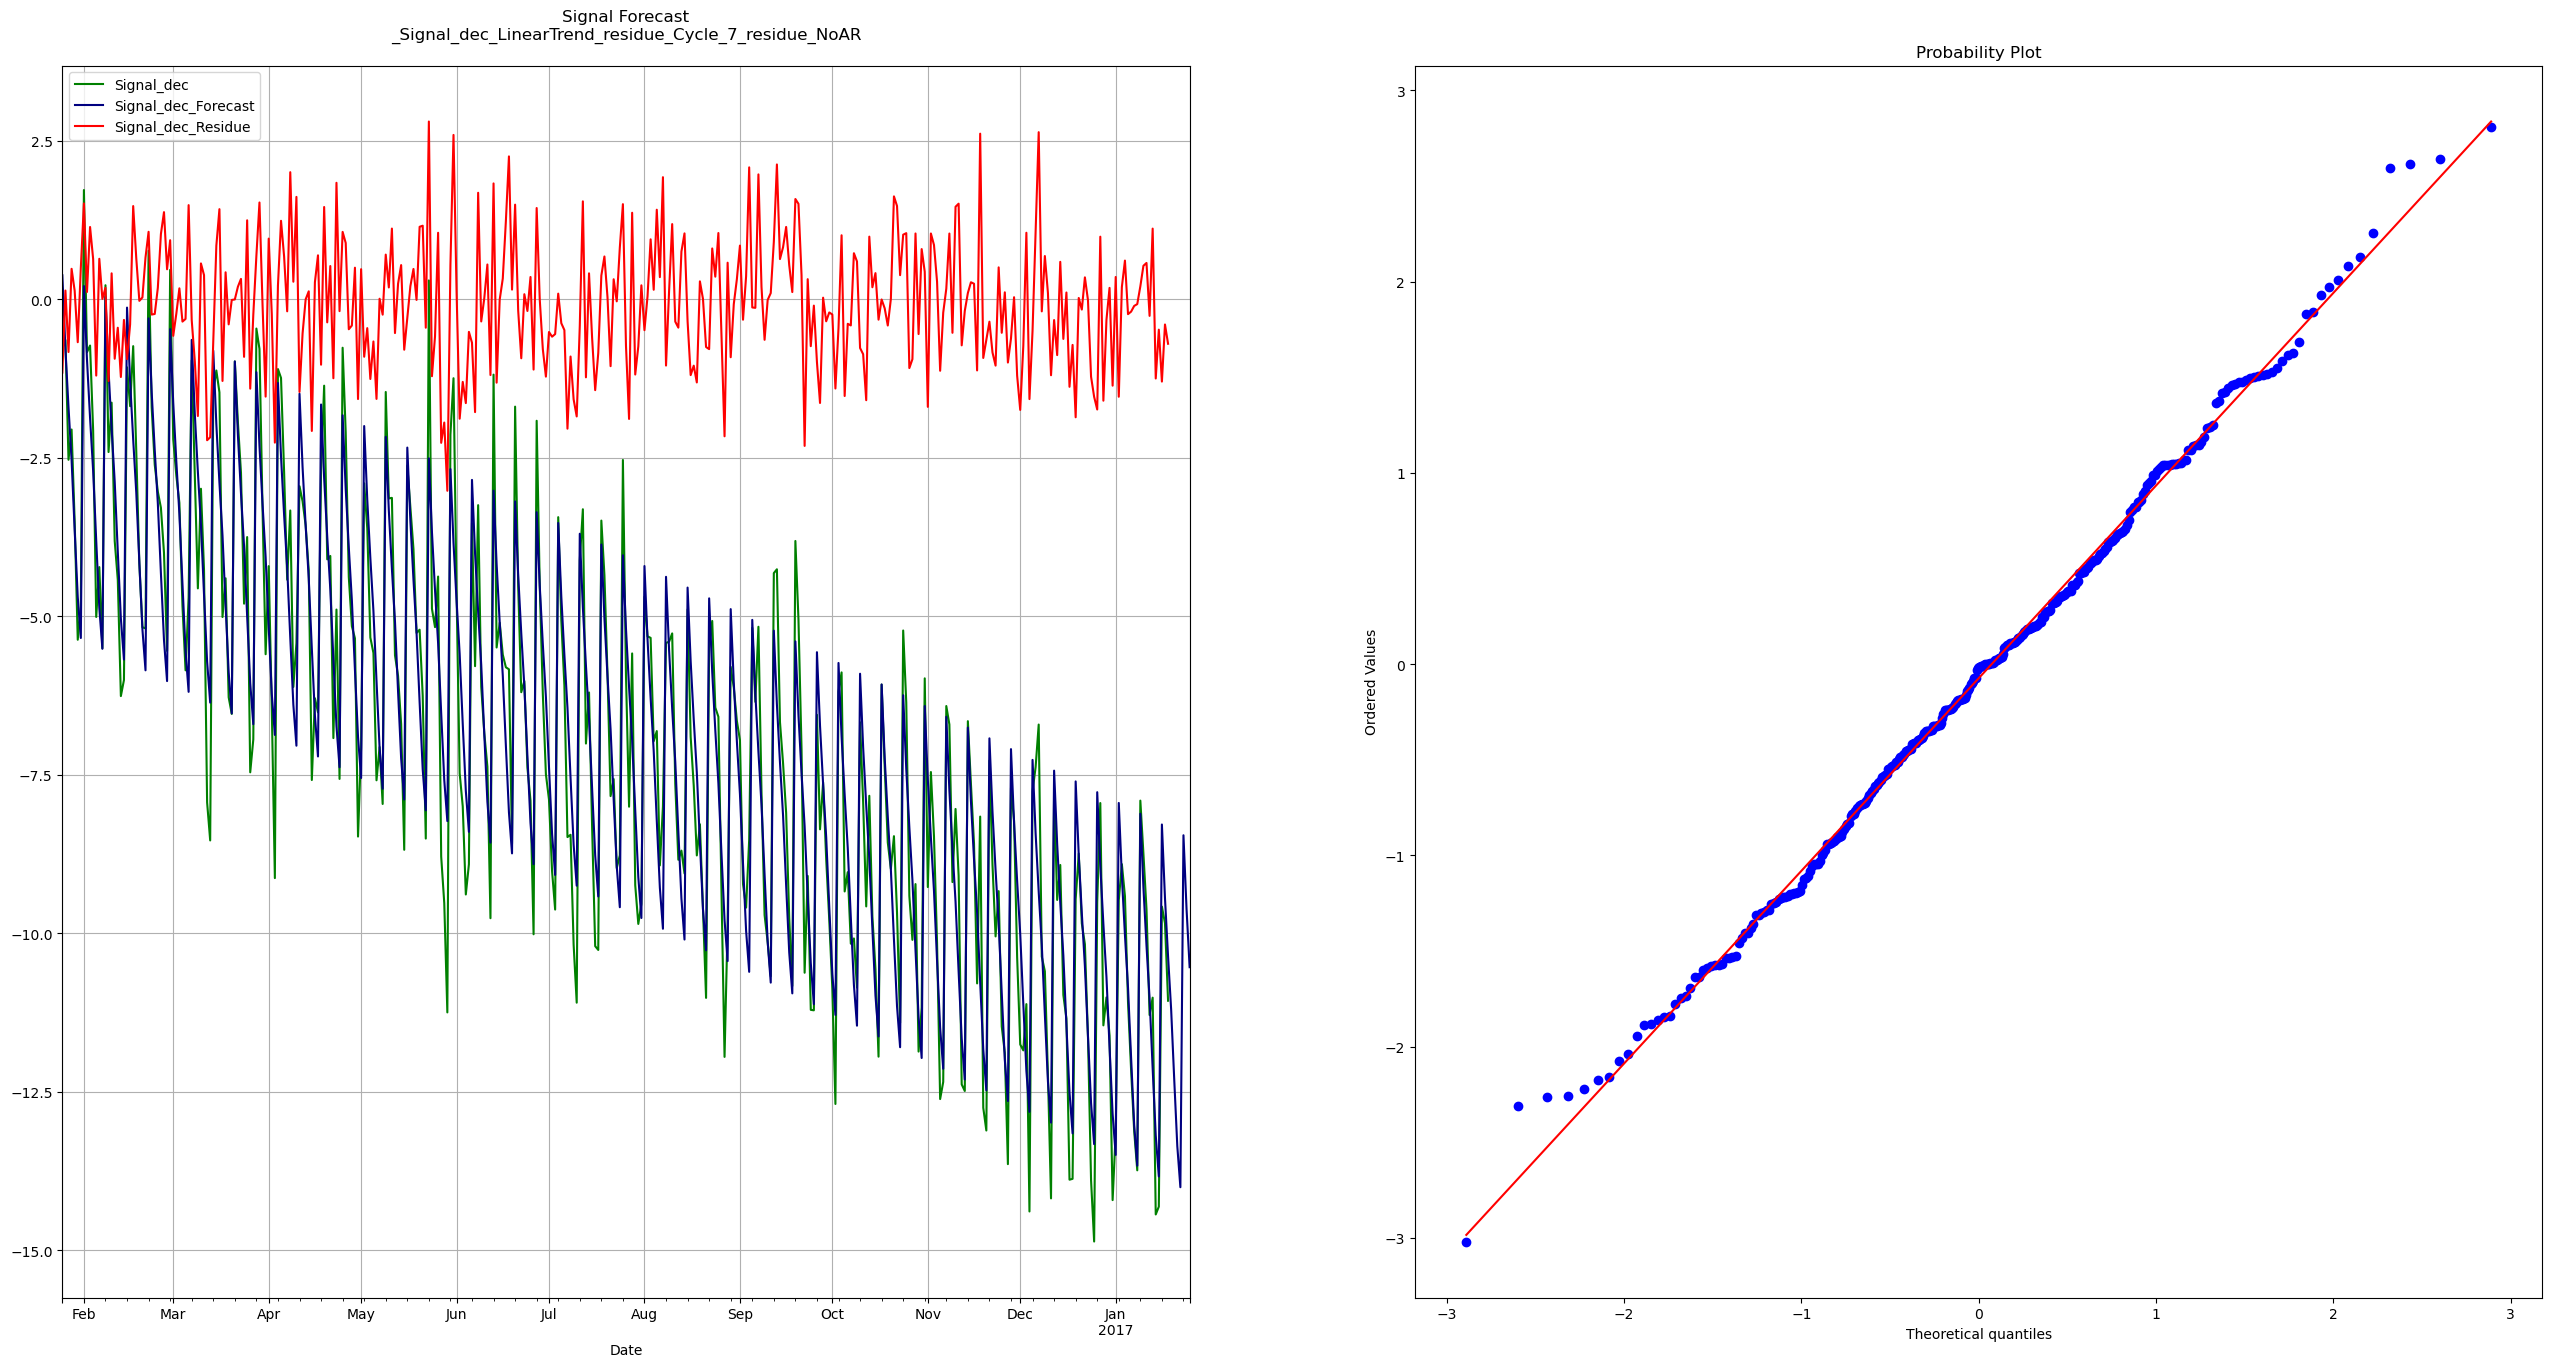

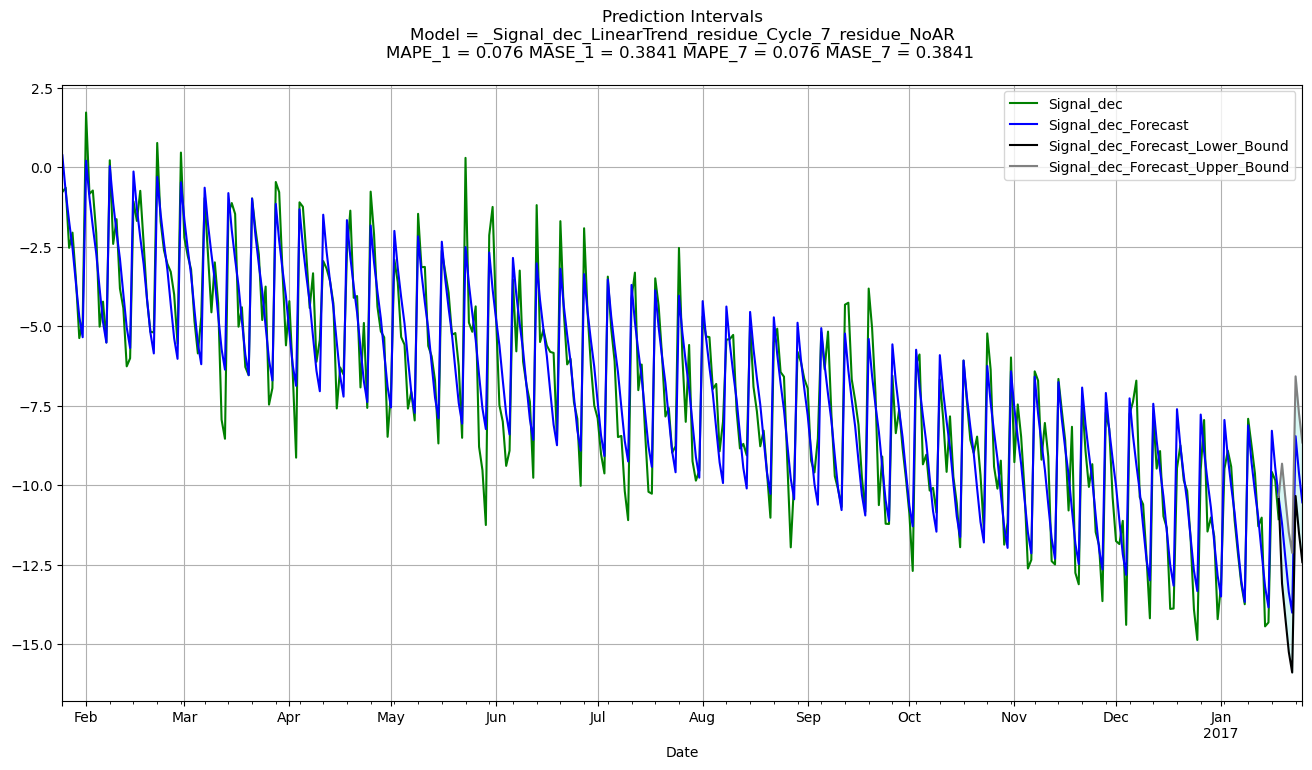

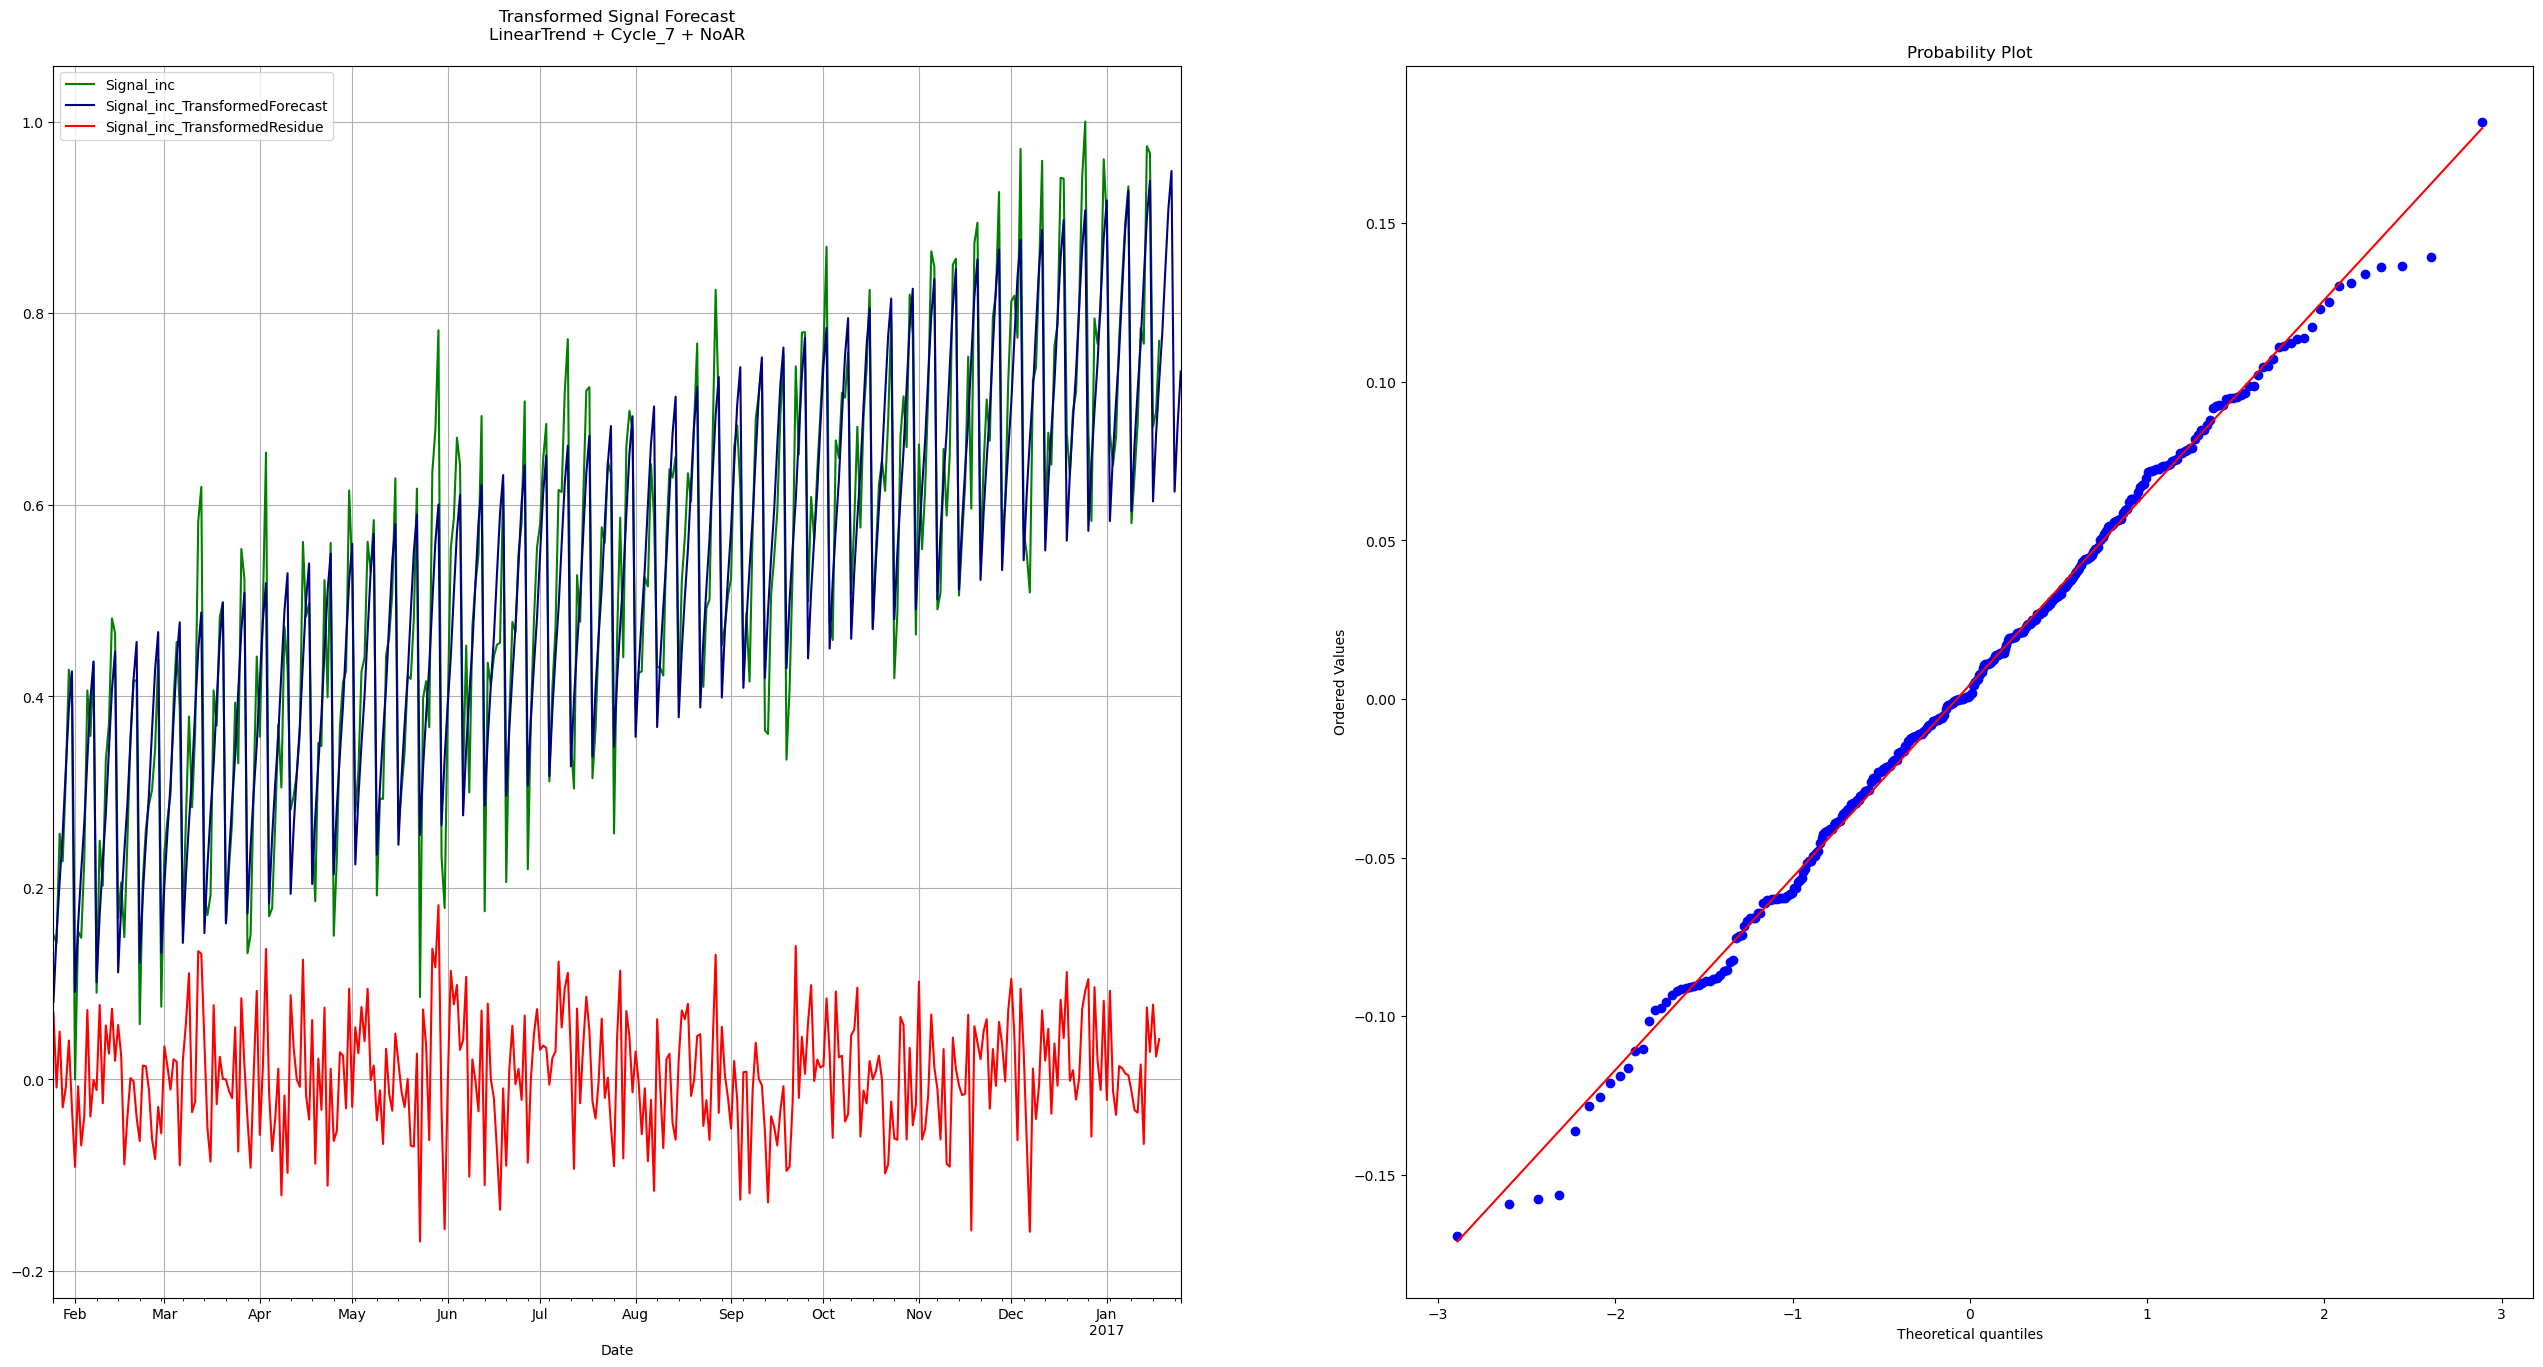

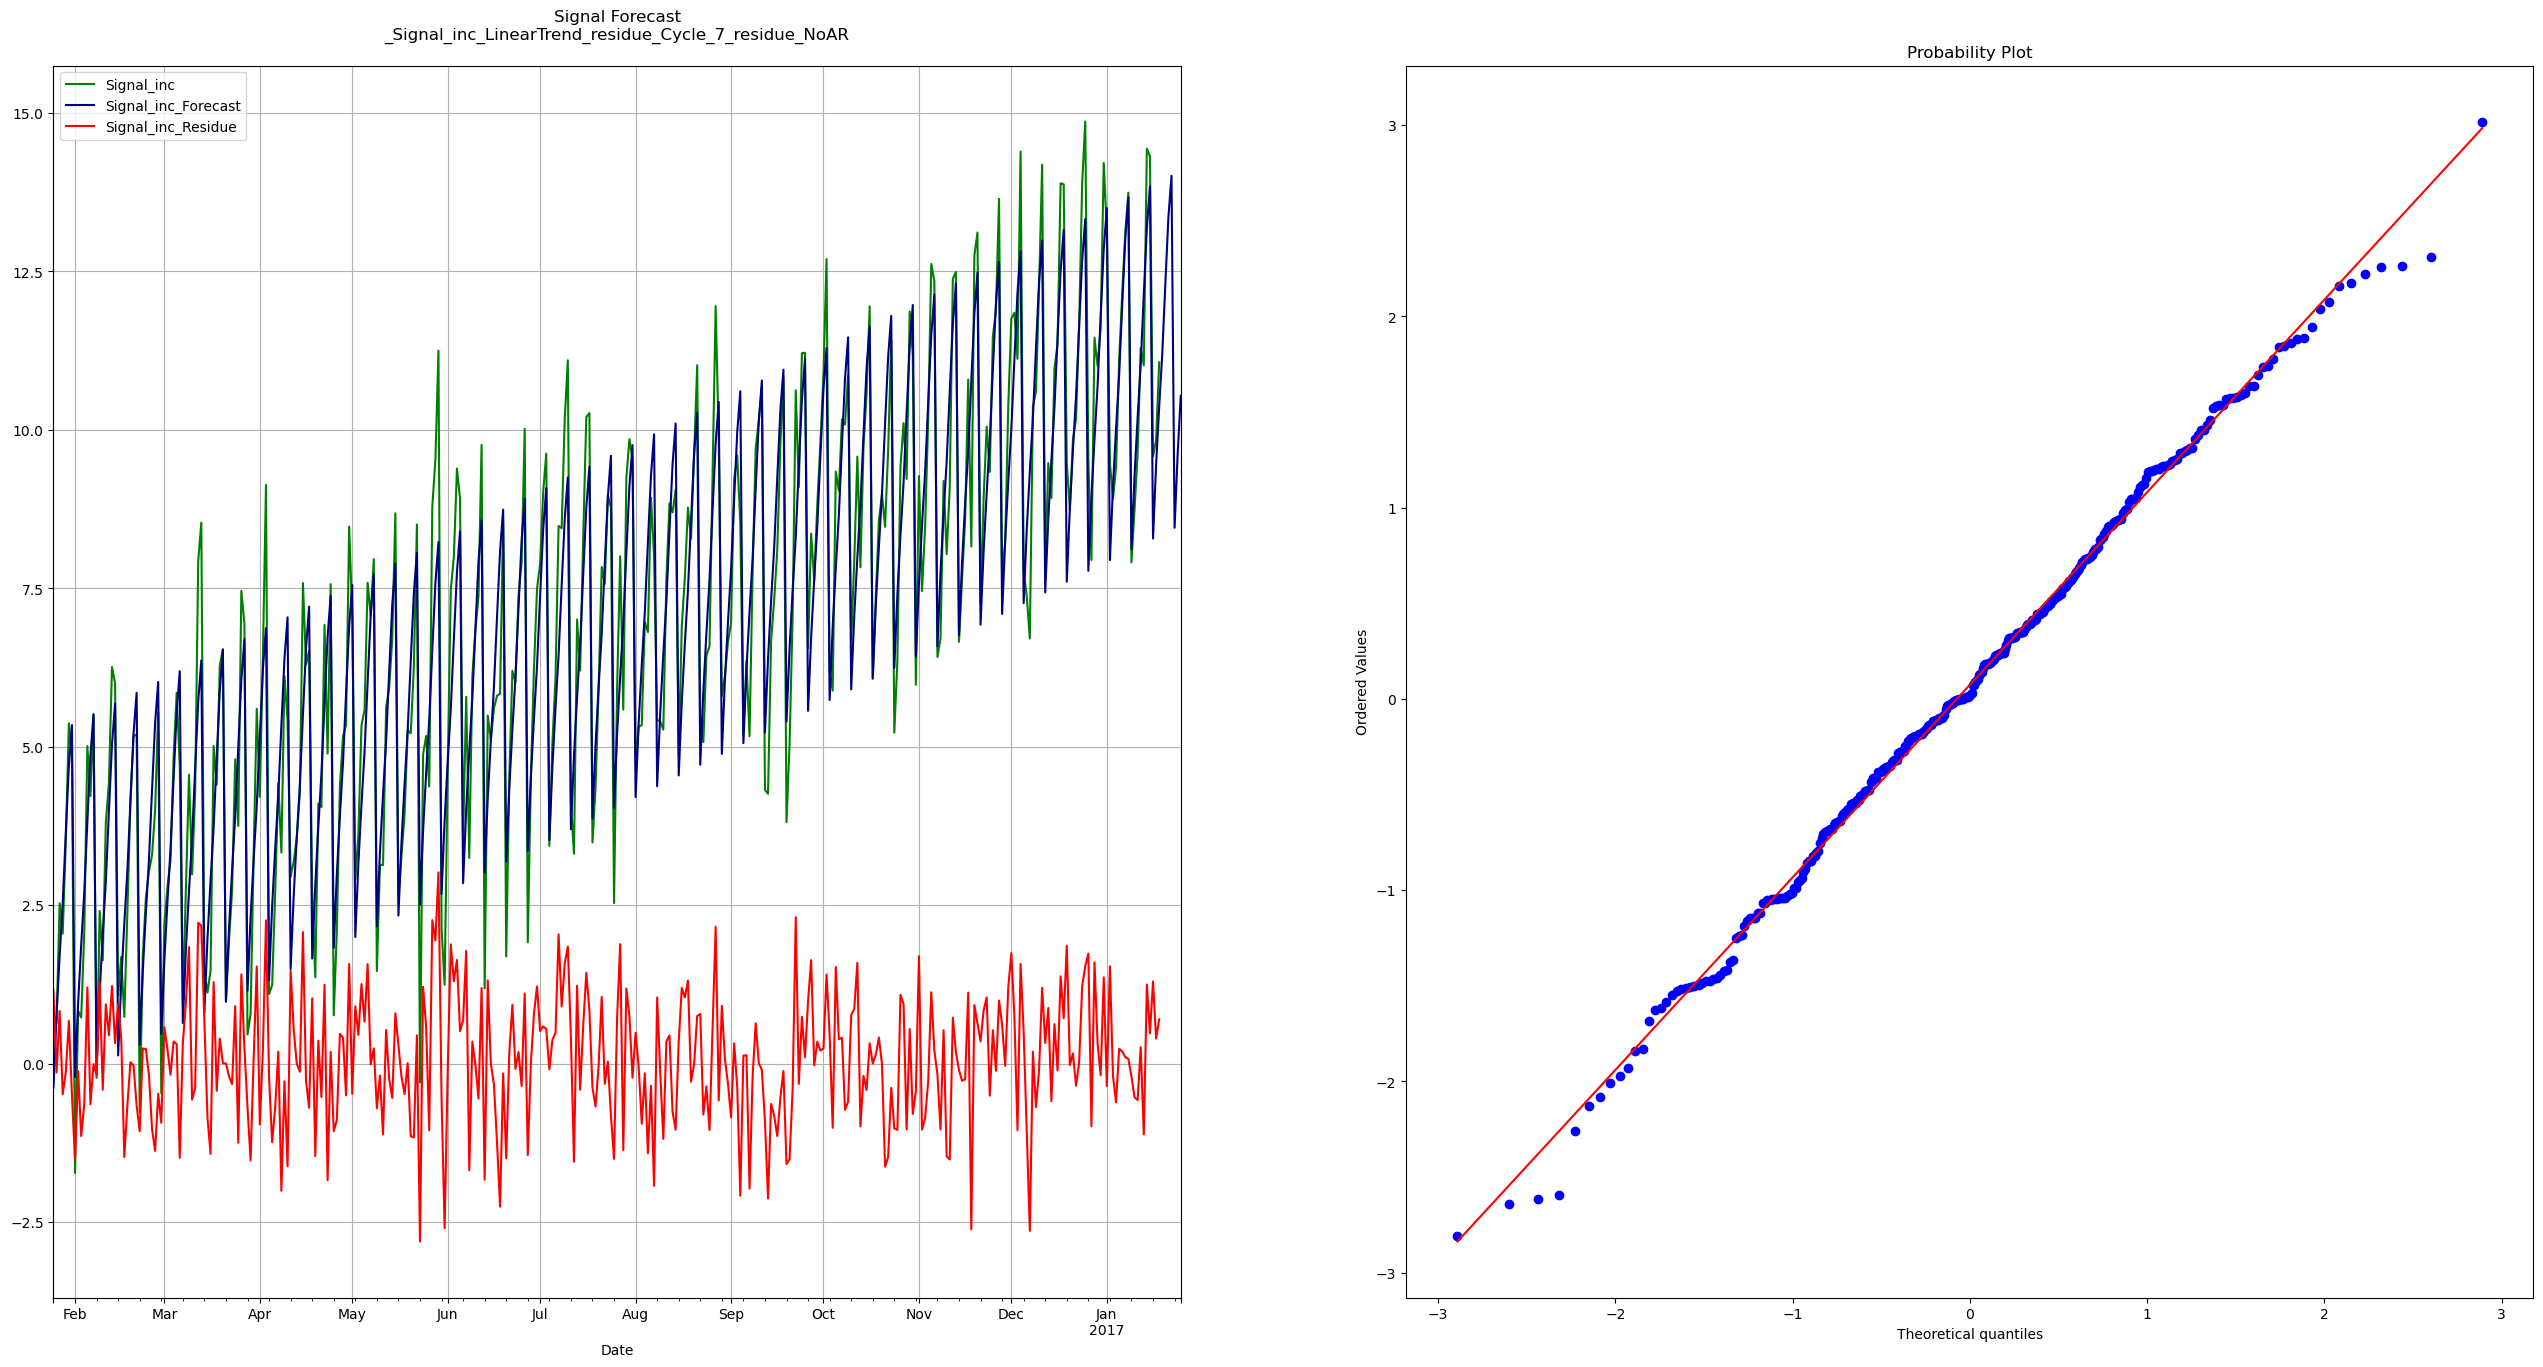

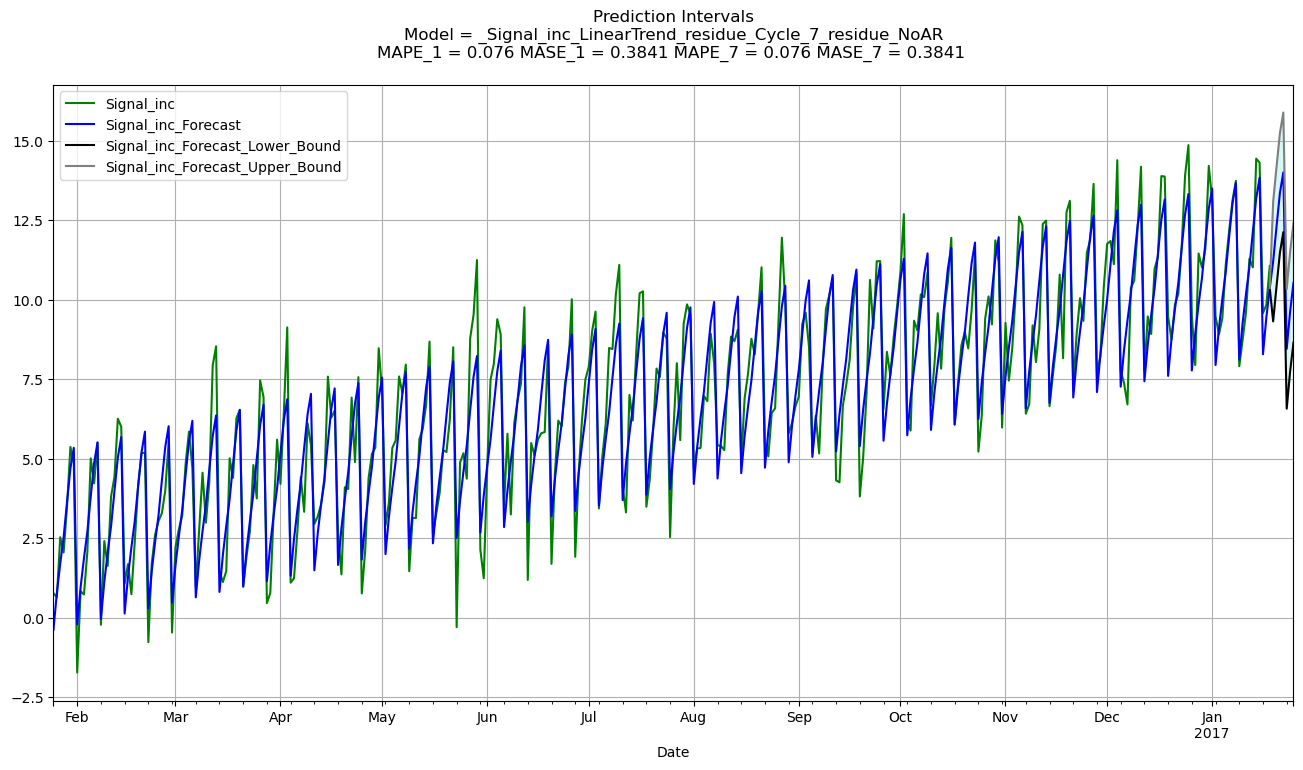

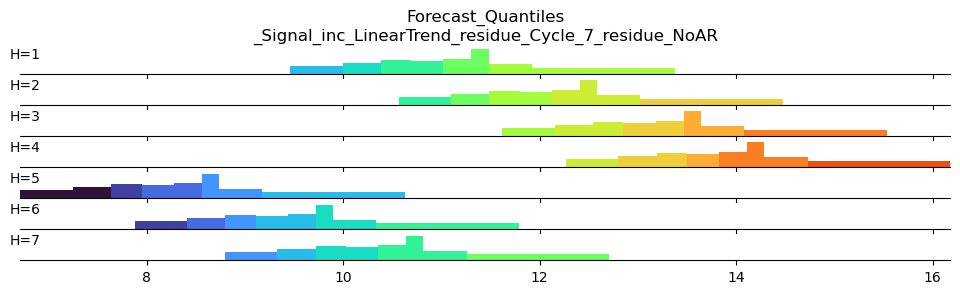

In [6]:
lEngine.standardPlots()

In [7]:

# predict one week
df_forecast = lEngine.forecast(iInputDS = df_train, iHorizon = 7)
# list the columns of the forecast dataset
print(df_forecast.columns) #

# print the real forecasts
print(df_forecast['Date'].tail(7).values)

print(df_forecast['Signal_inc_Forecast'].tail(7).values)
print(df_forecast['Signal_dec_Forecast'].tail(7).values)

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Signal_dec', 'Signal_inc'], 'Horizon': 7}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.255, ('FORECASTING', {'Signals': ['Signal_dec', 'Signal_inc'], 'Horizon': 7}))


Index(['Date', 'Signal_dec', 'row_number', 'Date_Normalized',
       'scaled_Signal_dec', '_Signal_dec', '_Signal_dec_LinearTrend',
       '_Signal_dec_LinearTrend_residue', 'cycle_internal',
       '_Signal_dec_LinearTrend_residue_Cycle_7',
       '_Signal_dec_LinearTrend_residue_Cycle_7_residue',
       '_Signal_dec_LinearTrend_residue_Cycle_7_residue_NoAR',
       '_Signal_dec_LinearTrend_residue_Cycle_7_residue_NoAR_residue',
       'Signal_dec_Transformed', '_Signal_dec_Trend',
       '_Signal_dec_Trend_residue', '_Signal_dec_Cycle',
       '_Signal_dec_Cycle_residue', '_Signal_dec_AR', '_Signal_dec_AR_residue',
       '_Signal_dec_TransformedForecast', 'Signal_dec_Forecast',
       '_Signal_dec_TransformedResidue', 'Signal_dec_Residue',
       'Signal_dec_Forecast_Lower_Bound', 'Signal_dec_Forecast_Upper_Bound',
       'Signal_dec_Forecast_Quantile_2', 'Signal_dec_Forecast_Quantile_14',
       'Signal_dec_Forecast_Quantile_26', 'Signal_dec_Forecast_Quantile_38',
       'Signal_de